In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

df=pd.read_csv('train.csv')

In [67]:
factors=df.drop(['id','target'],axis=1)
response=df['target']

X_train,X_test,y_train,y_test=train_test_split(factors,response,test_size=0.3)

In [68]:
abc = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),cv=6,
                    param_grid={'n_estimators':[25,50,100,300,500,800],
                                'learning_rate':[0.1,0.3,0.5,0.7]},
                  n_jobs=-1)
                   
model = abc.fit(X_train,y_train)
y_pred = model.predict(X_test) 

C:\Users\MX341\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7066666666666667


In [70]:
#abc.cv_results_
abc.best_params_

{'learning_rate': 0.7, 'n_estimators': 100}

In [71]:
df_test=pd.read_csv('test.csv')
df_test=df_test.drop(['id'],axis=1)
prediction=model.predict(df_test)


submission=pd.read_csv('sample_submission.csv')
submission['target']=prediction
submission.to_csv('submission.csv',index=False)

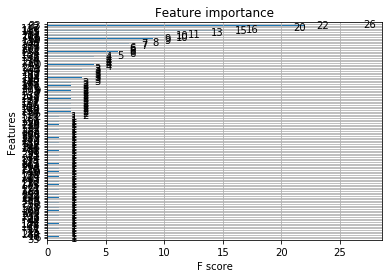

In [57]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('train.csv')
factors=df.drop(['id','target'],axis=1)
response=df['target']

X_train,X_test,y_train,y_test=train_test_split(factors,response,test_size=0.3)

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)

param = {'max_depth':5, 'eta':0.2, 'silent':1, 'objective':'binary:logistic',
        'eval_metric':'auc','booster':'gbtree','gamma':0,'subsample':1}

# specify validations set to watch performance
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 500
bst = xgb.train(param, dtrain, num_round, watchlist,verbose_eval=0)
#cv = xgb.cv(param,dtrain,num_round,nfold=5,verbose_eval=0)


xgb.plot_importance(bst)
plt.show()

In [9]:
df_test=pd.read_csv('test.csv')
df_test=df_test.drop(['id'],axis=1)
dsubmit=xgb.DMatrix(df_test)
prediction=cv.predict(dsubmit)


submission=pd.read_csv('sample_submission.csv')
submission['target']=prediction
submission.to_csv('submission.csv',index=False)